In [5]:
import glacierml as gl
import configparser
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature

In [6]:
parameterization = '1'
config = configparser.ConfigParser()
config.read('model_parameterization.txt')

data = gl.load_training_data(
    root_dir = '/data/fast1/glacierml/data/',
    area_scrubber = config[parameterization]['area scrubber'],
    anomaly_input = float(   config[parameterization]['size threshold']   )
)
data = data.drop(
    data[data['distance test'] >= float(config[parameterization]['distance threshold']  
                                            )].index
)
data

,RGIId,CenLat,CenLon,Area,Zmin,Zmed,Zmax,Slope,Aspect,Lmax,Thickness,region,size difference,RGI Centroid Distance,AVG Radius,Roundness,distance test
0,RGI60-01.00037,63.469173,-146.528168,234.583,722,1841,3081,12.0,30,41911,235.0,01,0.046411,1851.480653,8641.185569,0.206179,0.214262
1,RGI60-01.00570,63.281000,-145.427000,17.567,1162,1858,2438,14.0,172,8639,147.0,01,0.090735,707.576070,2364.688092,0.273722,0.299226
2,RGI60-01.01104,58.380000,-134.349000,9.528,676,1123,1494,10.0,327,6332,66.0,01,0.185641,643.556206,1741.509861,0.275033,0.369539
3,RGI60-01.02236,69.276000,-143.819000,0.153,2360,2440,2554,22.0,219,680,83.0,01,0.979324,622.846071,220.683965,0.324535,2.822344
4,RGI60-01.02236,69.276000,-143.819000,0.153,2360,2440,2554,22.0,219,680,82.0,01,0.974585,622.846071,220.683965,0.324535,2.822344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,-65.052700,-63.393600,0.213,10,-999,50,0.0,-9,318,312.0,19,0.999174,77370.878372,260.384342,0.818819,297.141056
496,RGI60-19.01950,-62.047200,-58.376500,7.240,30,-999,630,7.4,150,5187,238.0,19,0.984430,2079.113914,1518.078910,0.292670,1.369569
497,RGI60-19.02058,-62.675200,-60.390600,1.160,10,-999,370,10.0,260,1118,89.0,19,0.754757,1013.640365,607.650778,0.543516,1.668130
498,RGI60-19.02059,-62.670700,-60.354700,5.493,10,-999,370,6.7,273,3056,97.0,19,0.020856,193.860066,1322.299590,0.432690,0.146608


In [7]:
RGI = gl.load_RGI()

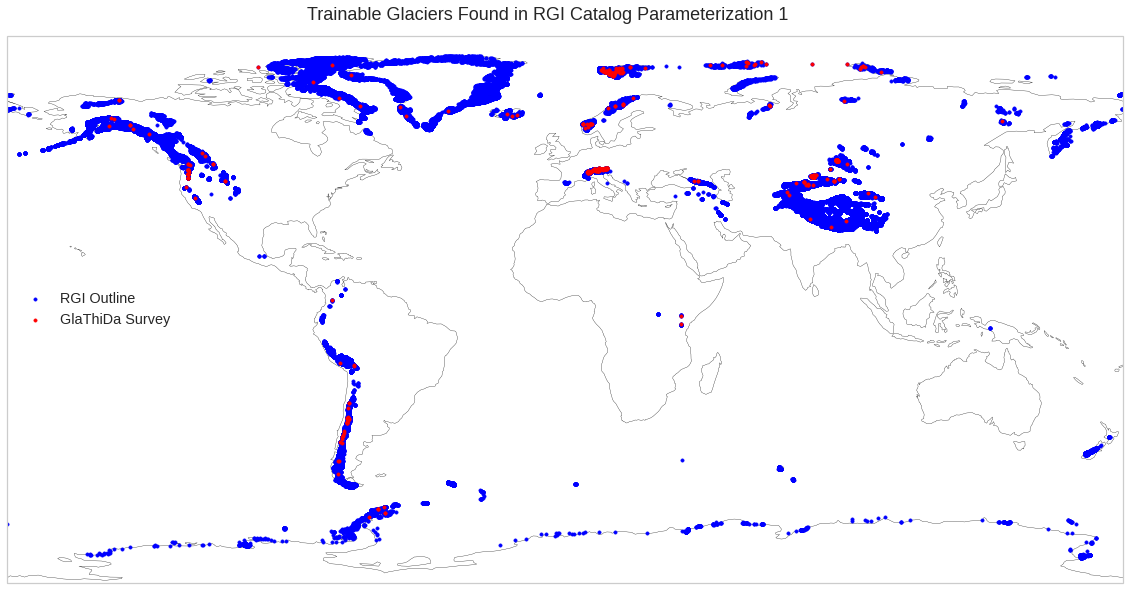

In [8]:

fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
plt.scatter(
    x = RGI['CenLon'], 
    y = RGI['CenLat'],
    c = 'blue',
#     color = colors[n],
#         cmap = 'viridis',
    marker = '.', 
    alpha = 1,
    label = 'RGI Outline'

)
plt.scatter(
    x = data['CenLon'], 
    y = data['CenLat'],
    c = 'red',
#     color = colors[n],
#         cmap = 'viridis',
    marker = '.', 
    alpha = 1,
    label = 'GlaThiDa Survey'

)

plt.legend(loc = 'center left', fontsize = 'large')
plt.suptitle('Trainable Glaciers Found in RGI Catalog Parameterization ' + 
             parameterization, y = 0.7125, fontsize = 18)




plt.show()